# COSMO WCS

In [1]:
%pylab inline
from astropy.io import fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
cc = {'cmap':'inferno', 'vmin':-.01, 'vmax':0.1}

In [3]:
dlp_filename = 'dlp_samples.fits'
dlp_samples = fits.getdata(dlp_filename).astype('float32')
dlp_samples.shape

(400, 360, 360)

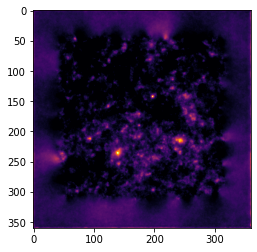

In [4]:
dlp_mean = dlp_samples.mean(axis=0)
imshow(dlp_mean, **cc)

In [5]:
from astropy.wcs import WCS

# create a fits map
res = 0.29/60

wcs_helix_list = WCS(naxis=2)
wcs_helix_list.wcs.crpix = [360//2, 360//2] # reference pixel point
wcs_helix_list.wcs.crval = [150.11, 2.24] # reference coordinates
wcs_helix_list.wcs.cunit = ["deg", "deg"]
wcs_helix_list.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_helix_list.wcs.cdelt = [res, res]
wcs_helix_list.array_shape = [360, 360]
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 150.11  2.24  
CRPIX : 180.0  180.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.004833333333333333  0.004833333333333333  
NAXIS : 360  360

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

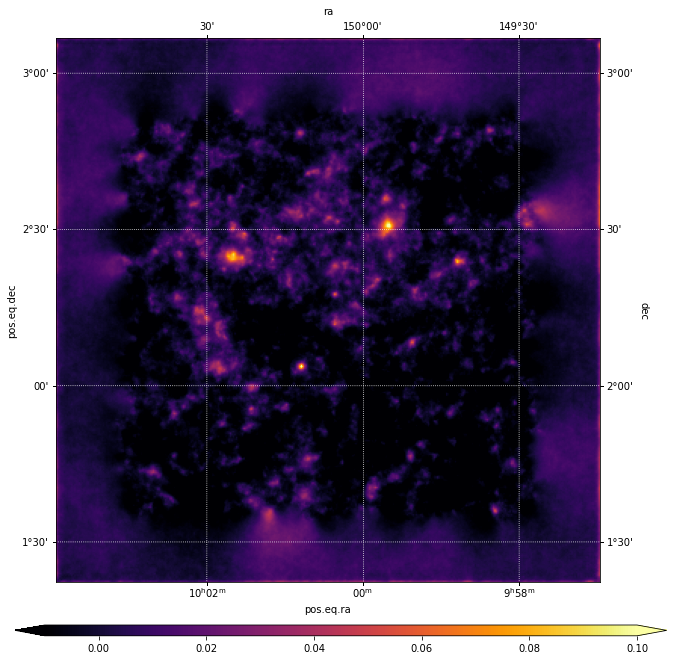

In [7]:
width = 360
resolution = 0.29

vmin = -.01
vmax = 0.1

kwargs = dict(cmap='inferno', vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix_list)
im = ax.imshow(dlp_mean, origin='lower', aspect='equal', **kwargs)

#ax.invert_yaxis()
ax.invert_xaxis()
#plt.xlabel(r'RA')
#plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

cbar_ax = fig.add_axes([.078, 0.05, .905, 0.015])
cb = fig.colorbar(im, cax=cbar_ax, extend='both', orientation="horizontal")
#cb.ax.tick_params(labelsize=18)

In [8]:
data = dlp_mean
header = wcs_helix_list.to_header()
hdu = fits.PrimaryHDU(data=data, header=header)

In [9]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  360                                                  
NAXIS2  =                  360                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                180.0 / Pixel coordinate of reference point            
CRPIX2  =                180.0 / Pixel coordinate of reference point            
CDELT1  =   0.0048333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0048333333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

## Massey COSMOS map

In [10]:
massey = fits.getdata('cosmos_e.fits')
massey.shape

(477, 492)

In [29]:
from astropy import wcs

with fits.open('cosmos_e.fits') as hdul:
    hdul.info()
    print(hdul[0].header)
    w = wcs.WCS(hdul[0].header)

Filename: cosmos_e.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (492, 477)   float32   
SIMPLE  =                    T /image conforms to FITS standard                 BITPIX  =                  -32 /bits per data value                             NAXIS   =                    2 /number of axes                                  NAXIS1  =                  492 /                                                NAXIS2  =                  477 /                                                EXTEND  =                    T /file may contain extensions                     DATE    = '2006-11-09'         / Creation date (CCYY-MM-DD) of FITS header      AUTHOR  = 'Richard Massey'     / Email: rjm@astro.caltech.edu                   OBJECT  = 'Weak-lens mass map' /                                                CDELT1  =          -0.00277778 /                                                CDELT2  =           0.00277778 /                

In [30]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 150.796  1.5696  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00277778  0.00277778  
NAXIS : 492  477

In [13]:
360/2

180.0

In [14]:
# 150.796
n = 142
150.11 + n*0.004833

150.796286

In [15]:
# 1.56960
n = 142
2.24 - n*0.004833

1.5537140000000003

(284, 284)


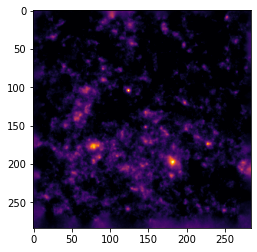

In [24]:
dlp_cropped = dlp_mean[180-142:180+142,180-142:180+142]
dlp_cropped = dlp_cropped[:,::-1]
print(dlp_cropped.shape)
imshow(dlp_cropped, **cc)

(477, 492)


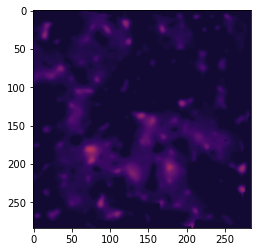

In [25]:
from skimage import transform

print(massey.shape)
massey_cropped = massey[:,-477:]
massey_flipped = massey_cropped[:,:]
massey_resized = transform.resize(massey_flipped, (284, 284))
imshow(massey_resized, **cc)

In [65]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

Text(0.5, -1.5, '$\\kappa$')

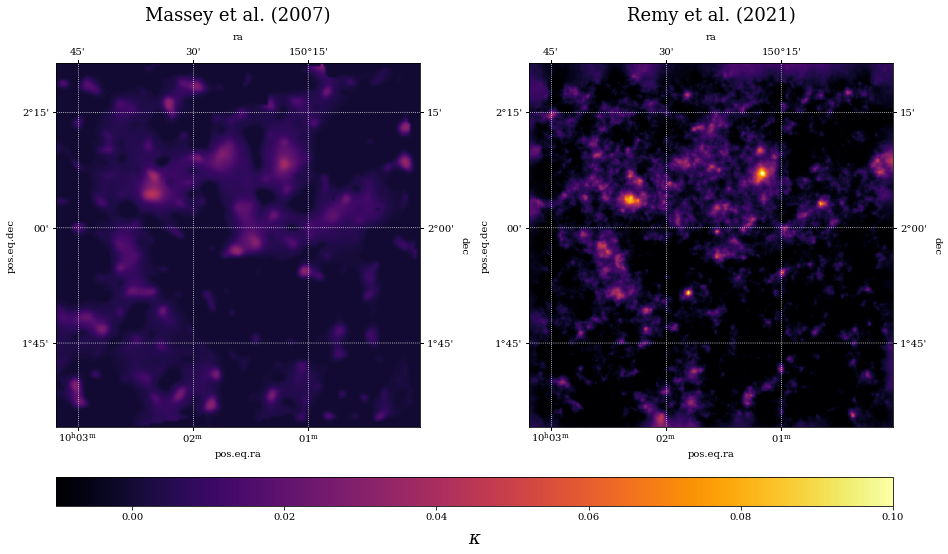

In [66]:
width = 360
resolution = 0.29

vmin = -.01
vmax = 0.1

font = dict(fontsize=18)
kwargs = dict(cmap='inferno', vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(15,8))

ax0 = fig.add_subplot(121, projection=w)
#ax = plt.add_subplot(1,1,1)
im = ax0.imshow(massey_resized, origin='lower', aspect='equal', **kwargs)
ax0.set_title('Massey et al. (2007)', y=1.1, **font)
overlay = ax0.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

#ax.invert_yaxis()
#ax[0].invert_xaxis()

ax1 = fig.add_subplot(122, projection=w)
im = ax1.imshow(dlp_cropped, origin='lower', aspect='equal', **kwargs)
ax1.set_title('Remy et al. (2021)', y=1.1, **font)
overlay = ax1.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
#ax.invert_yaxis()
#ax[1].invert_xaxis()

#overlay = ax.get_coords_overlay('icrs')
#overlay.grid(color='white', ls='dotted')
ax0p = ax0.get_position()
ax1p = ax1.get_position()

fig.subplots_adjust(wspace=0.3)

cbar_ax = fig.add_axes([ax0p.x0, 0.05, ax1p.x1-ax0p.x0, 0.05])
cb = fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cbar_ax.set_title(r'$\kappa$', y=-1.5, **font)
#cb.ax.tick_params(labelsize=18)